In [ ]:
Title

I. Introduction

Background:

Question: 

Data description: 

II. Method and results 
Description:

In [7]:
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally) 
options(repr.matrix.max.rows = 6)
source('cleanup.R')

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'cleanup.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [3]:
#Load datasets
player_info <- read_csv("Data/players-2.csv")
player_info
session_info <- read_csv("Data/sessions-2.csv")
session_info

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


In [4]:
#Wrangle and clean data
session_info_clean <- session_info |>
  mutate(
    start_time = as.POSIXct(start_time, format = "%d/%m/%Y %H:%M", tz = "UTC"),
    end_time = as.POSIXct(end_time, format = "%d/%m/%Y %H:%M", tz = "UTC"),
    session_length = as.numeric(difftime(end_time, start_time, units = "mins"))) |>
  filter(session_length > 0)

session_summary <- session_info_clean |>
  group_by(hashedEmail) |>
  summarise(
    total_sessions = n(),
    avg_session_length = mean(session_length),
    total_playtime_mins = sum(session_length))

merged_df <- player_info |>
  left_join(session_summary, by = "hashedEmail") |>
  mutate(
    subscribe = factor(subscribe),
    gender = factor(gender),
    experience = factor(experience)) |>
    drop_na()

merged_df

experience,subscribe,hashedEmail,played_hours,name,gender,Age,total_sessions,avg_session_length,total_playtime_mins
<fct>,<fct>,<chr>,<dbl>,<chr>,<fct>,<dbl>,<int>,<dbl>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,27,74.77778,2019
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,3,85.00000,255
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,1,5.00000,5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22,1,21.00000,21
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,1,5.00000,5
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,6,29.83333,179


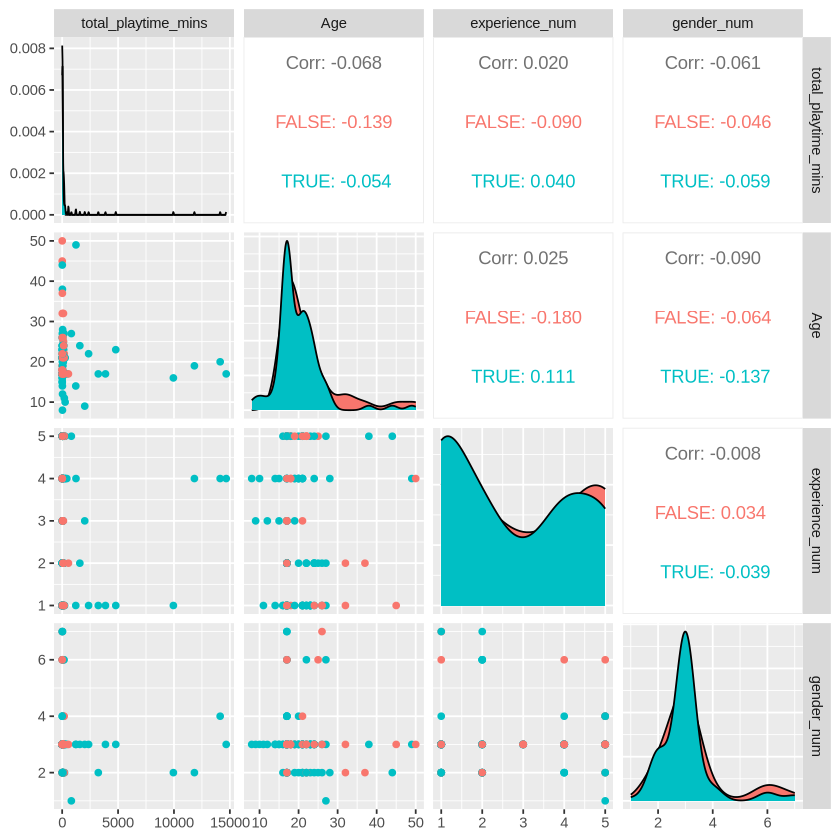

In [37]:
#Visulization
model_numeric <- merged_df |>
  mutate(
    experience_num = as.numeric(experience),
    gender_num = as.numeric(gender)
  ) |>
  select(total_playtime_mins, Age, experience_num, gender_num, subscribe) |>
  drop_na() |>
  mutate(subscribe = as.factor(subscribe)) 

ggpairs(
  model_numeric,
  columns = 1:4,  
  aes(color = subscribe)
)

In [38]:
model_numeric <- model_numeric |>
  mutate(subscribe_num = as.numeric(subscribe))  

model_numeric <- model_numeric |>
  mutate(subscribe_num = subscribe_num - 1)

cor(model_numeric[, 1:3], model_numeric$subscribe_num)


total_playtime_mins,0.14512313
Age,-0.17302353
experience_num,-0.07909065


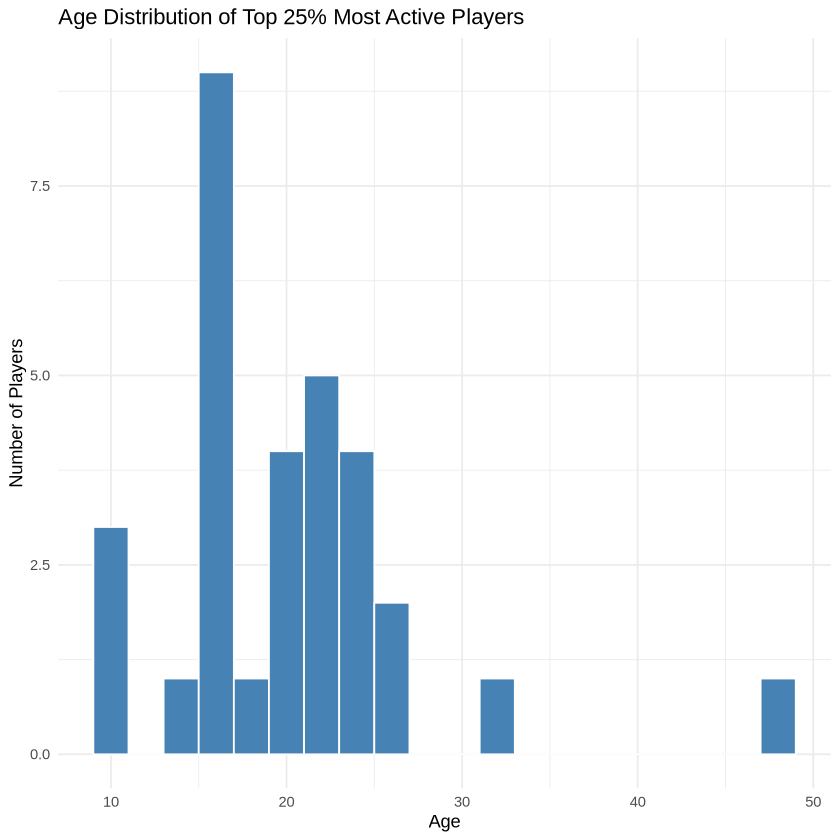

In [45]:
top_players <- merged_df |>
  drop_na(Age, total_playtime_mins) |>
  filter(total_playtime_mins >= quantile(total_playtime_mins, 0.75))

ggplot(top_players, aes(x = Age)) +
  geom_histogram(binwidth = 2, fill = "steelblue", color = "white") +
  labs(title = "Age Distribution of Top 25% Most Active Players",
       x = "Age", y = "Number of Players") +
  theme_minimal()

`geom_smooth()` using formula = 'y ~ x'


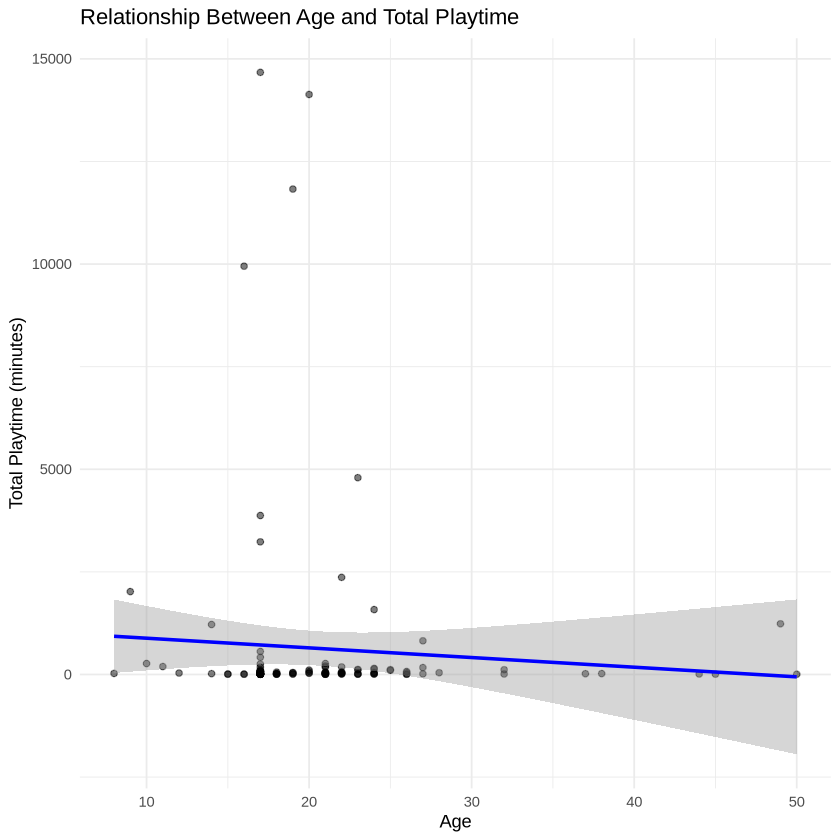

In [41]:
ggplot(merged_df, aes(x = Age, y = total_playtime_mins)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "lm", se = TRUE, color = "blue") +
  labs(title = "Relationship Between Age and Total Playtime",
       x = "Age", y = "Total Playtime (minutes)") +
  theme_minimal()